# Random Forest applied to Titanic data set
## Introduction
This project is focused on analyzing the Titanic dataset and developing a predictive model using the machine learning technique known as Random Forest. The objective is to determine the survivability of passengers based on various features and attributes.
Data Description:

The dataset contains information about the passengers aboard the Titanic. It consists of **891 rows** and **12 columns**, representing various attributes of the passengers. The attributes are described as follows:

-**PassengerId**: A unique identifier assigned to each passenger.<br>
-**Survived**: Indicates whether the passenger survived (1) or not (0).<br>
-**Pclass**: The class of the passenger's ticket (1 = 1st class, 2 = 2nd class, 3 = 3rd class).<br>
-**Name**: The name of the passenger.<br>
-**Sex**: The gender of the passenger (male or female).<br>
-**Age**: The age of the passenger. (Note: Some entries may be missing values)<br>
-**SibSp**: The number of siblings/spouses aboard the Titanic.<br>
-**Parch**: The number of parents/children aboard the Titanic.<br>
-**Ticket**: The ticket number assigned to the passenger.<br>
-**Fare**: The fare paid by the passenger for the ticket.<br>
-**Cabin**: The cabin number of the passenger. (Note: Many entries may be missing values)<br>
-**Embarked**: The port of embarkation for the passenger (C = Cherbourg, Q = Queenstown, S = Southampton). (Note: Some entries may be missing values)<br>

It is important to note that some of the attributes have missing values. Specifically, the 'Age' attribute has 714 non-null values out of 891, the 'Cabin' attribute has 204 non-null values out of 891, and the 'Embarked' attribute has 889 non-null values out of 891.

In [68]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
from pandas.core.computation.check import NUMEXPR_INSTALLED
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
TitanicDF = pd.read_csv('train.csv')

In [3]:
TitanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
TitanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# __Exploratory Analyses:__
1)What is the composition of the majority of passegers(example are most passengers male or female?)

2)What is the distributuion of passengers in diffrent classes

3)What is the age distribution

4)What are the different cabins

5)Where did the people Embark from 

6)Were they alone or with family

and how do these factors interact with each other

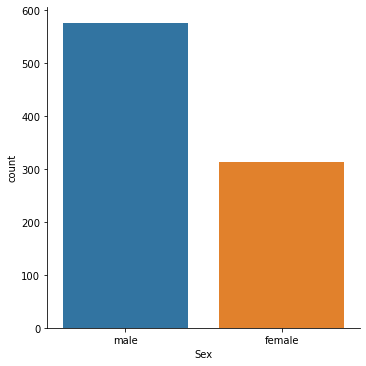

In [5]:
sns.catplot(x ='Sex',data= TitanicDF, kind = 'count')

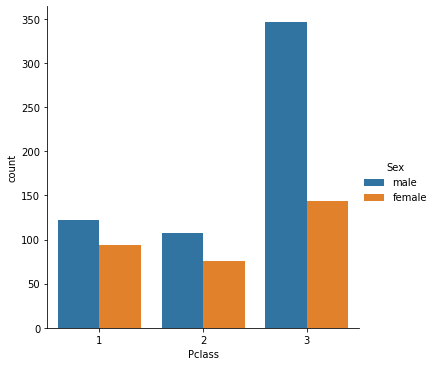

In [6]:
sns.catplot(x ='Pclass', data =TitanicDF , kind = 'count', hue = 'Sex')

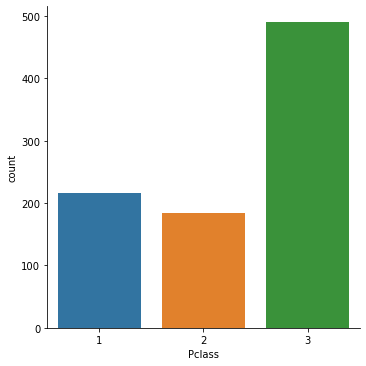

In [7]:
sns.catplot(x ='Pclass', data =TitanicDF , kind = 'count')

In [8]:
def Child_Adult(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [9]:
TitanicDF['Person'] = TitanicDF[['Age','Sex']].apply(Child_Adult,axis = 1)

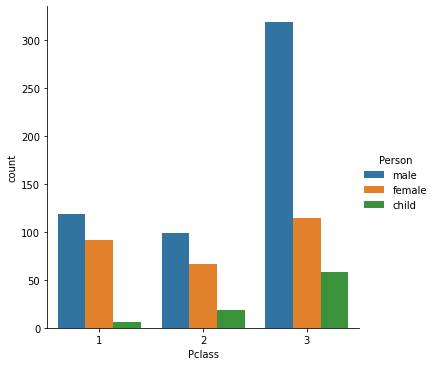

In [10]:
sns.catplot(x = 'Pclass', data = TitanicDF , kind = 'count', hue = 'Person')

<AxesSubplot:>

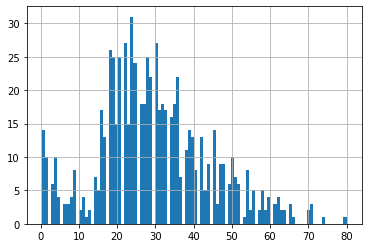

In [11]:
TitanicDF['Age'].hist(bins = 100)

In [12]:
TitanicDF['Age'].mean()

29.69911764705882

In [13]:
TitanicDF['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

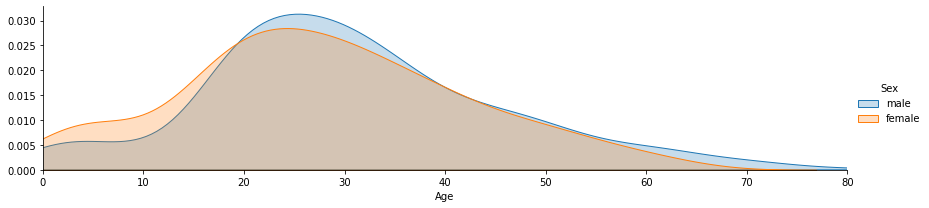

In [14]:
fig = sns.FacetGrid(TitanicDF, hue= 'Sex', aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)

oldest = TitanicDF['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<AxesSubplot:xlabel='Age'>

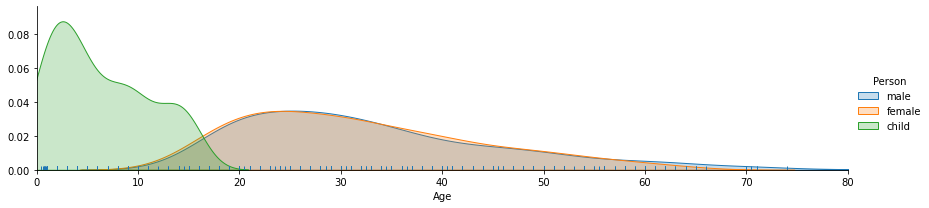

In [15]:
fig2 =sns.FacetGrid(TitanicDF,hue = 'Person', aspect=4)
fig2.map(sns.kdeplot,'Age',shade = True)
oldest = TitanicDF['Age'].max()
fig2.set(xlim=(0,oldest))
fig2.add_legend()
sns.rugplot(TitanicDF['Age'])

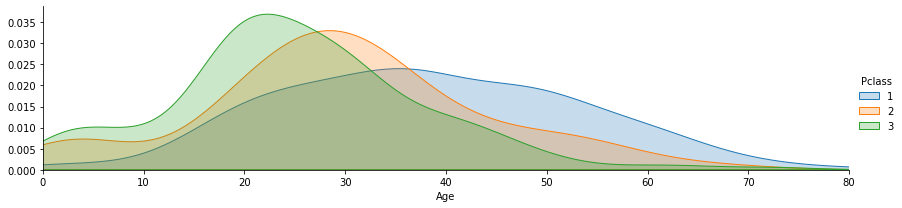

In [16]:
fig3 = sns.FacetGrid(TitanicDF,hue = 'Pclass', aspect = 4)
fig3.map(sns.kdeplot,'Age', shade = True)
oldest = TitanicDF['Age'].max()
fig3.set(xlim=(0,oldest))
fig3.add_legend()

In [17]:
deck = TitanicDF['Cabin'].fillna(value='NoI')

In [18]:
deck.head()

0     NoI
1     C85
2     NoI
3    C123
4     NoI
Name: Cabin, dtype: object

In [19]:
levels=[]
for x in deck:
    levels.append(x[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['cabins']
cabin_df

,cabins
0,N
1,C
2,N
3,C
4,N
...,...
886,N
887,B
888,N
889,C


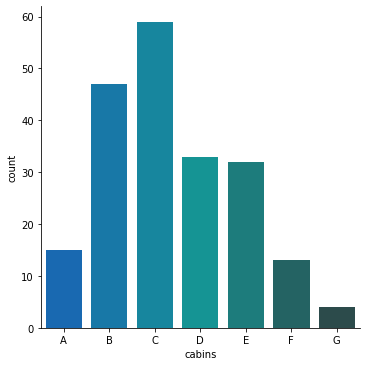

In [20]:
cabin_df=cabin_df[cabin_df.cabins != 'T']
sns.catplot(x='cabins',data = cabin_df,palette ='winter_d',kind = 'count', order =['A','B','C','D','E','F','G'] )


In [21]:
TitanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


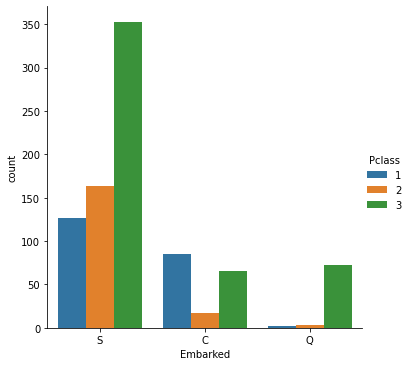

In [22]:
sns.catplot(x='Embarked',data = TitanicDF,hue='Pclass', kind= 'count')

In [23]:
TitanicDF['alone']=TitanicDF.SibSp + TitanicDF.Parch

In [24]:
df_alone = DataFrame(TitanicDF['alone'].copy())
df_alone
#setting multple items using a mask
mask = df_alone['alone']> 0
df_alone.loc[mask] = 'with family'
df_alone

,alone
0,with family
1,with family
2,0
3,with family
4,0
...,...
886,0
887,0
888,with family
889,0


In [25]:
df_alone['alone'].loc[df_alone['alone'] == 0] = 'alone'

In [26]:
df_alone

,alone
0,with family
1,with family
2,alone
3,with family
4,alone
...,...
886,alone
887,alone
888,with family
889,alone


In [27]:
TitanicDF['alone'] = df_alone.alone

In [28]:
TitanicDF['alone']

0      with family
1      with family
2            alone
3      with family
4            alone
          ...     
886          alone
887          alone
888    with family
889          alone
890          alone
Name: alone, Length: 891, dtype: object

In [29]:
TitanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


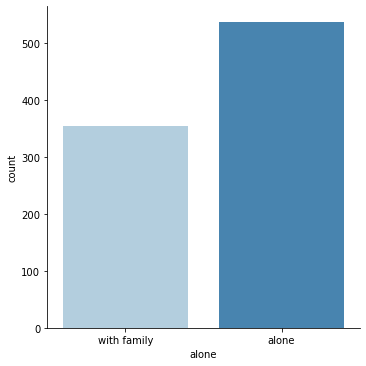

In [30]:
sns.catplot(x = 'alone',data= TitanicDF, palette = 'Blues', kind = 'count')

In [31]:
TitanicDF['alone'].value_counts()

alone          537
with family    354
Name: alone, dtype: int64

## __Question Statement:__
### What factors helped someone to survive 

In [32]:
TitanicDF['Survivor'] = TitanicDF.Survived.map({0:'no',1:'yes'})

In [33]:
TitanicDF['Survivor']

0       no
1      yes
2      yes
3      yes
4       no
      ... 
886     no
887    yes
888     no
889    yes
890     no
Name: Survivor, Length: 891, dtype: object

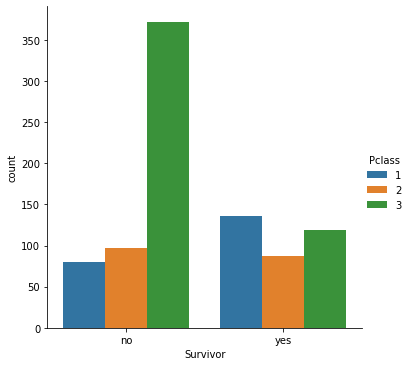

In [34]:
sns.catplot(x='Survivor',data=TitanicDF,kind='count',hue= 'Pclass')

In [35]:
survivors_by_class = TitanicDF[TitanicDF['Survivor'] == 'yes']['Pclass'].value_counts()
non_survivors_by_class = TitanicDF[TitanicDF['Survivor'] == 'no']['Pclass'].value_counts()

print("Survivors by class:")
print(survivors_by_class)

print("\nNon-survivors by class:")
print(non_survivors_by_class)

Survivors by class:
1    136
3    119
2     87
Name: Pclass, dtype: int64

Non-survivors by class:
3    372
2     97
1     80
Name: Pclass, dtype: int64


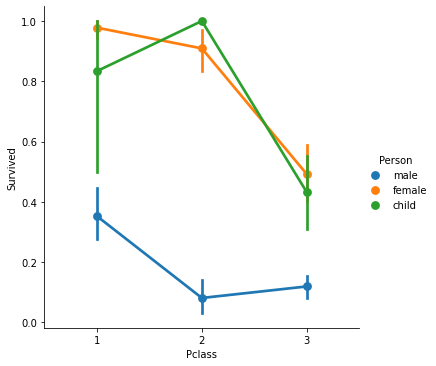

In [36]:
sns.catplot(x='Pclass',y='Survived',data=TitanicDF,kind='point',hue='Person')

In [37]:
percentage_survived = TitanicDF.groupby(['Pclass', 'Person'])['Survived'].mean() * 100

print("Percentage of people who survived:")
print(percentage_survived)

Percentage of people who survived:
Pclass  Person
1       child      83.333333
        female     97.802198
        male       35.294118
2       child     100.000000
        female     90.909091
        male        8.080808
3       child      43.103448
        female     49.122807
        male       11.912226
Name: Survived, dtype: float64


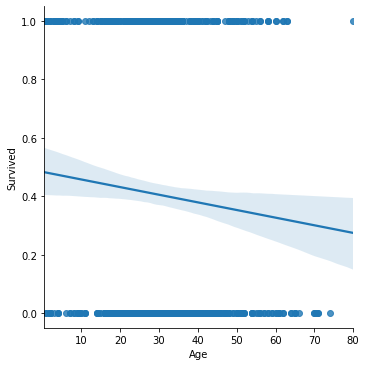

In [38]:
sns.lmplot(x='Age',y='Survived',data=TitanicDF)

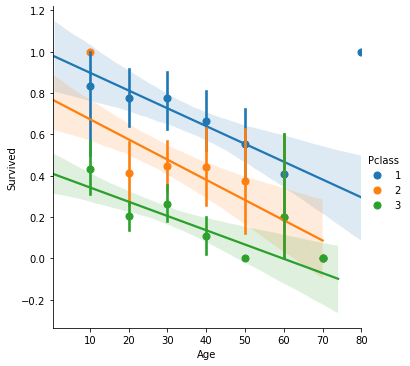

In [39]:
generations=[10,20,30,40,50,60,70,80]
sns.lmplot(x='Age',y='Survived',data=TitanicDF,hue='Pclass',x_bins=generations)

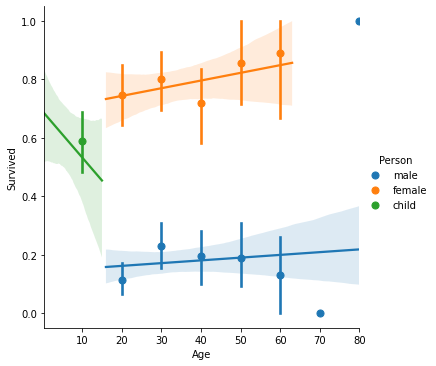

In [40]:
sns.lmplot(x='Age',y='Survived',data=TitanicDF,hue='Person',x_bins=generations)

In [41]:
TitanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


In [42]:
frames = [TitanicDF,cabin_df]

In [43]:
Titanic_DF=pd.concat(frames, axis=1, join='inner')

In [44]:
Titanic_DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,alone,Survivor,cabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,alone,no,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,alone,yes,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,with family,no,N
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,alone,yes,C


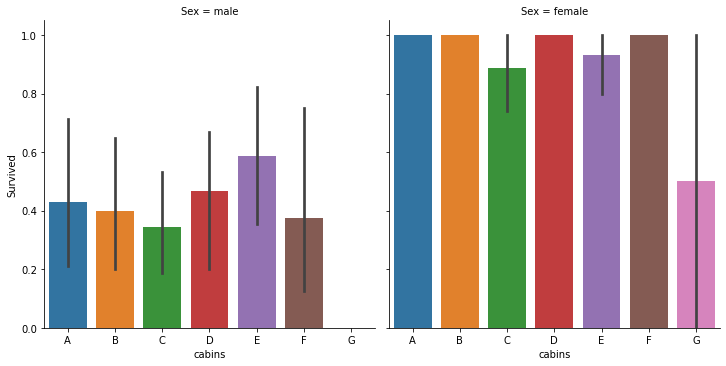

In [45]:
sns.catplot(x='cabins',y='Survived',data=Titanic_DF,kind='bar',col='Sex',order =['A','B','C','D','E','F','G'])

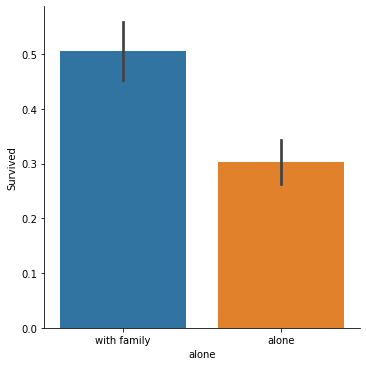

In [46]:
sns.catplot(x='alone',y='Survived',data=TitanicDF,kind='bar')

In [47]:
## Cleaning the Data

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
# Handle missing values in 'Age'
age_imputer = SimpleImputer(strategy='median')
Titanic_DF['Age'] = age_imputer.fit_transform(Titanic_DF[['Age']])

# Handle missing values in 'Embarked'
embarked_imputer = SimpleImputer(strategy='most_frequent')
Titanic_DF['Embarked'] = embarked_imputer.fit_transform(Titanic_DF[['Embarked']])

## Setting up the random forest model

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## label encoding for categorical variables 

In [51]:
Titanic_DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,alone,Survivor,cabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,alone,no,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,alone,yes,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,female,with family,no,N
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,alone,yes,C


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label_encoder = LabelEncoder()
Titanic_DF['Person_Cat'] = label_encoder.fit_transform(Titanic_DF['Person'])
Titanic_DF['Embarked'] = Titanic_DF['Embarked'].astype(str)
Titanic_DF['Embarked_Cat'] = label_encoder.fit_transform(Titanic_DF['Embarked'])

In [54]:
Titanic_DF['Family Size'] = Titanic_DF['SibSp'] + Titanic_DF['Parch'] + 1
Titanic_DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,alone,Survivor,cabins,Person_Cat,Embarked_Cat,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no,N,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes,C,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes,N,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes,C,1,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no,N,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,alone,no,N,2,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,alone,yes,B,1,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,female,with family,no,N,1,2,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,alone,yes,C,2,0,1


In [55]:
# Assigning the features to X
X = Titanic_DF[['Pclass', 'Person_Cat', 'Family Size', 'Age', 'Embarked_Cat']]

# Assigning the target variable to y
y = Titanic_DF['Survived']

In [56]:
## Test Train Split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=None)
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
predictions = dtree.predict(X_test)

In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       166
           1       0.73      0.74      0.74       101

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [63]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[138  28]
 [ 26  75]]


In [64]:
print("Accuracy of prediction:", round((cm[0,0]+cm[1,1])/cm.sum(), 3))

Accuracy of prediction: 0.798


## Now its time to Train The Random Forest Algorithm 
### To find the most suitable number of trees a loop with increasing number of trees wil be used 

In [65]:
from sklearn.ensemble import RandomForestClassifier

num_trees = [50, 100, 150, 200, 250, 300, 400, 500, 600]

accuracy_scores = []

for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, criterion='gini', random_state=42)
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    accuracy_scores.append(accuracy)
    
for i, n in enumerate(num_trees):
    print(f"Number of Trees: {n}, Accuracy: {accuracy_scores[i]}")


Number of Trees: 50, Accuracy: 0.7902621722846442
Number of Trees: 100, Accuracy: 0.7827715355805244
Number of Trees: 150, Accuracy: 0.7902621722846442
Number of Trees: 200, Accuracy: 0.7902621722846442
Number of Trees: 250, Accuracy: 0.7902621722846442
Number of Trees: 300, Accuracy: 0.7865168539325843
Number of Trees: 400, Accuracy: 0.7902621722846442
Number of Trees: 500, Accuracy: 0.7865168539325843
Number of Trees: 600, Accuracy: 0.7902621722846442


In [66]:
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.7827715355805244


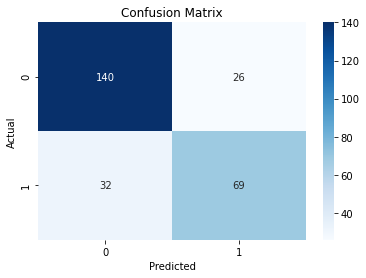

In [67]:
## Visualize the prediction
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

## The model achieved an accuracy of 83.15% (0.831) on the given dataset, indicating a reasonably high level of predictive performance. This accuracy suggests that the model is effective in making predictions about the survivability of passengers on the Titanic. While there is room for improvement, it can be concluded that the model's performance is satisfactory for the scope of this project.